## [A high-level API for statistical graphics](https://seaborn.pydata.org/tutorial/introduction.html)

In [53]:
%config InlineBackend.figure_format = 'retina'

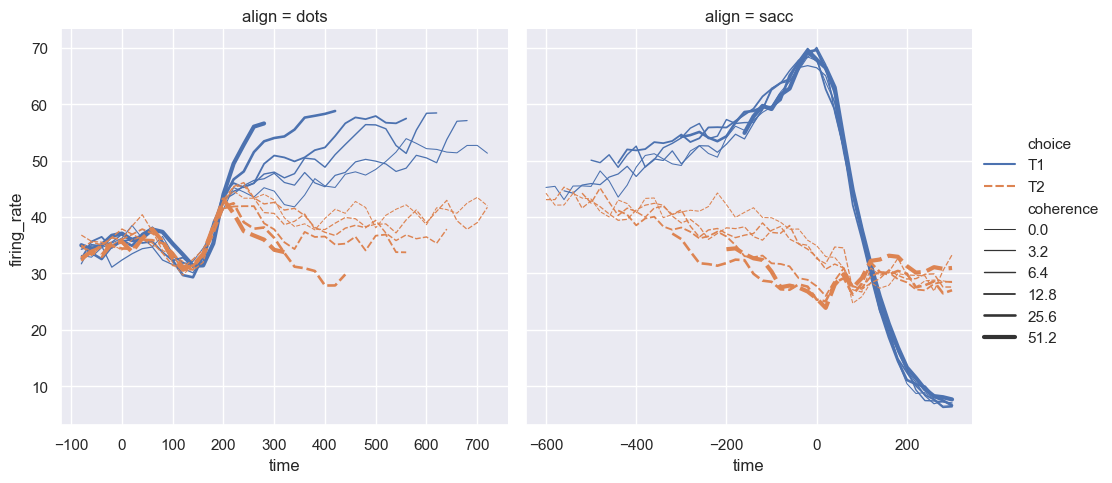

In [1]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

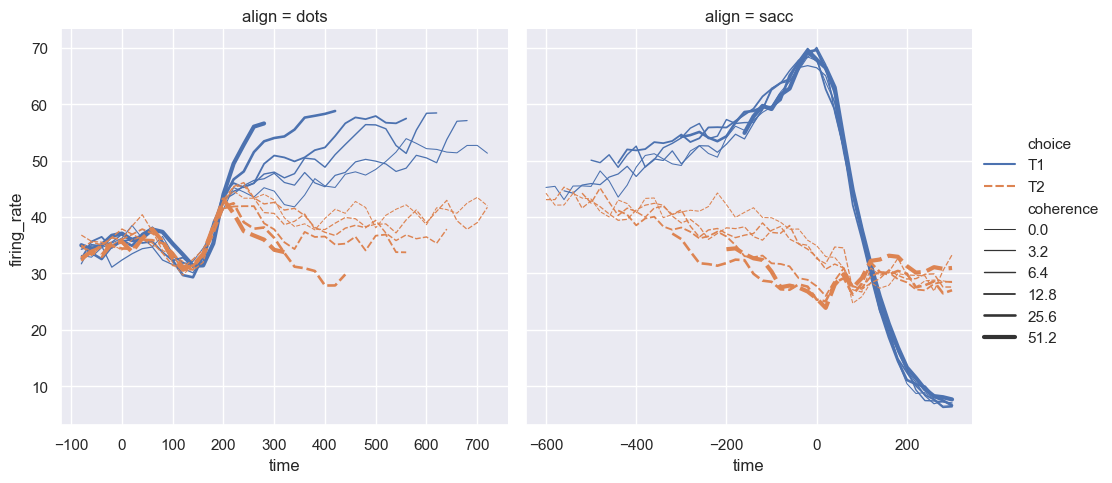

In [2]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
);

In [4]:
dots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        848 non-null    object 
 1   choice       848 non-null    object 
 2   time         848 non-null    int64  
 3   coherence    848 non-null    float64
 4   firing_rate  848 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.3+ KB


In [3]:
dots.head()

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487

In [6]:
dots['coherence'].unique()

array([ 0. ,  3.2,  6.4, 12.8, 25.6, 51.2])

In [7]:
dots['coherence'].value_counts()

0.0     174
3.2     170
6.4     156
12.8    142
25.6    116
51.2     90
Name: coherence, dtype: int64

In [9]:
dots['choice'].unique()

array(['T1', 'T2'], dtype=object)

In [8]:
dots['choice'].value_counts()

T2    430
T1    418
Name: choice, dtype: int64

In [11]:
flights = sns.load_dataset("flights")
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

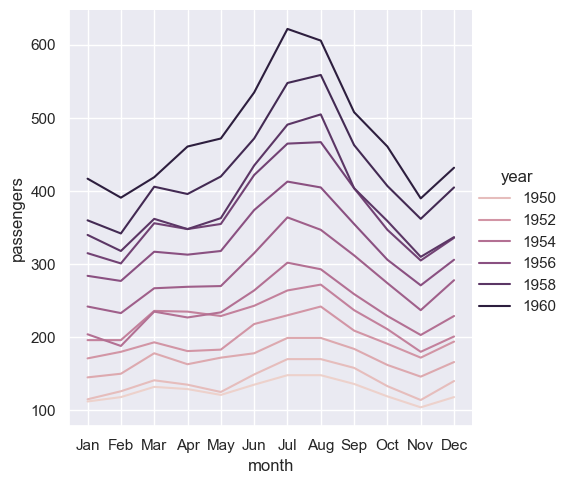

In [13]:
sns.relplot(
    data=flights, kind="line",
    x="month", y="passengers", hue='year'
);

In [17]:
fmri = sns.load_dataset("fmri")
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [18]:
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

In [19]:
fmri['subject'].unique()

array(['s13', 's5', 's12', 's11', 's10', 's9', 's8', 's7', 's6', 's4',
       's3', 's2', 's1', 's0'], dtype=object)

In [21]:
fmri['region'].unique()

array(['parietal', 'frontal'], dtype=object)

In [22]:
fmri['event'].unique()

array(['stim', 'cue'], dtype=object)

In [24]:
fmri['timepoint'].unique()

array([18, 14, 17,  9, 16, 15,  0, 13, 12, 11, 10,  3,  7,  8,  2,  6,  5,
        4,  1], dtype=int64)

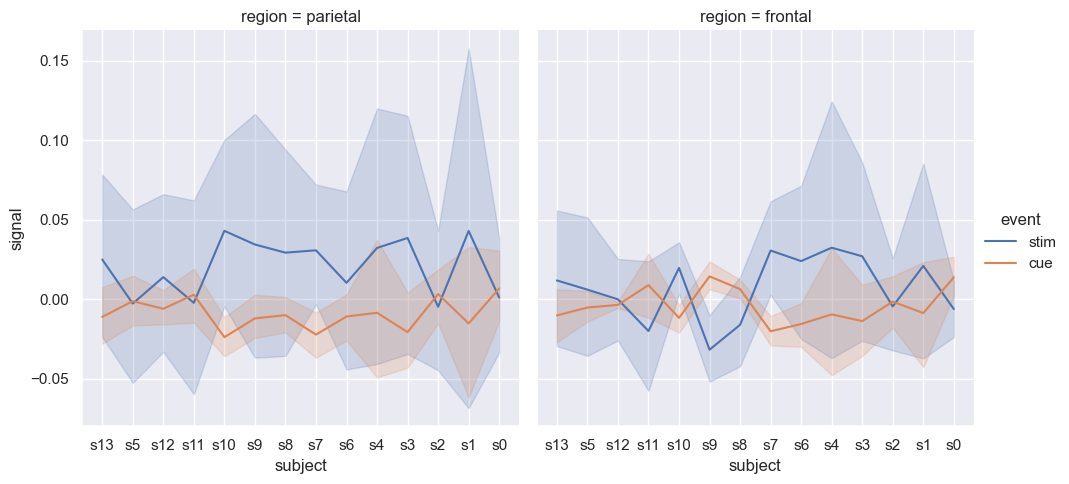

In [23]:
sns.relplot(
    data=fmri, kind="line",
    x="subject", y="signal", col="region", hue="event"    
);

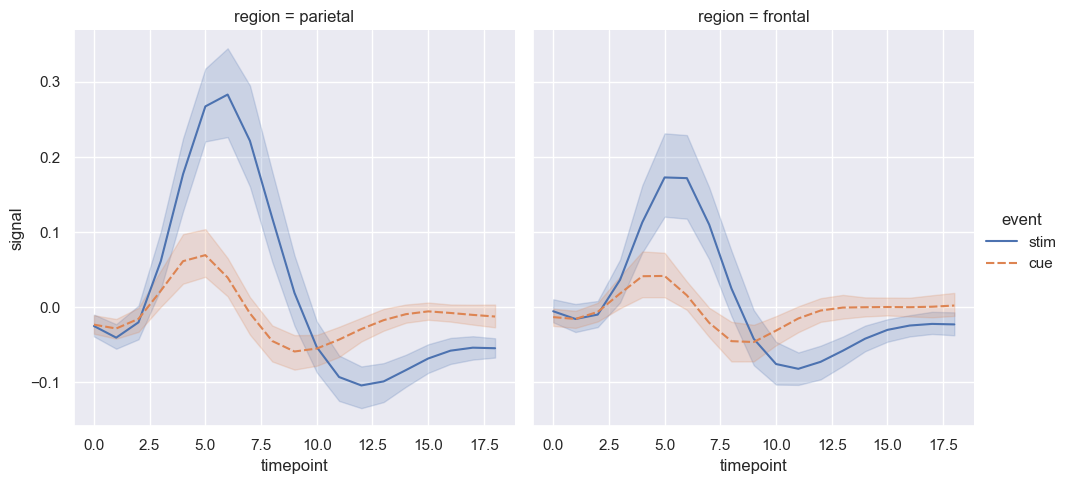

In [26]:
sns.relplot(data=fmri, kind="line",
            x="timepoint", y="signal", col="region", hue="event", style="event");

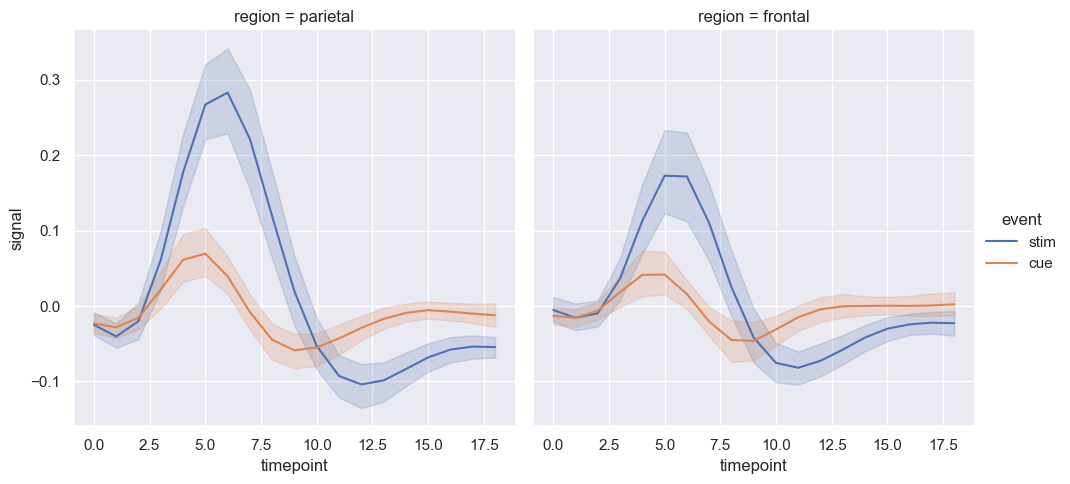

In [28]:
sns.relplot(data=fmri, kind="line",
            x="timepoint", y="signal", col="region", hue="event");

In [32]:
sns.lmplot(data=fmri, x="timepoint", y="signal", col="region", hue="event");

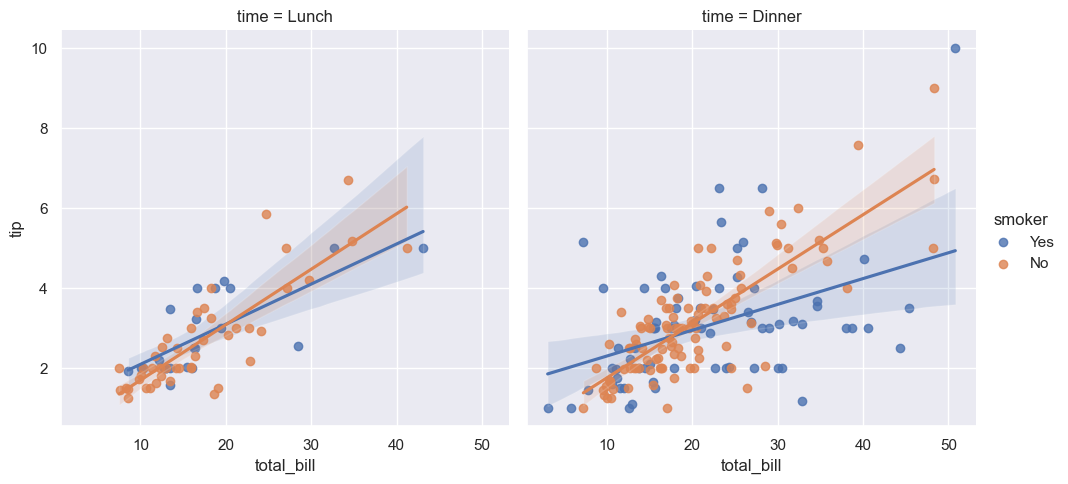

In [35]:
tips = sns.load_dataset("tips")
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker");

In [42]:
sns.displot(data=tips, x="total_bill", col="time", kde=True);

In [43]:
sns.displot(data=tips, x="total_bill", col="time", hue='smoker', kde=True);

In [44]:
sns.displot(data=tips, x="total_bill", col="time", row='smoker', kde=True);

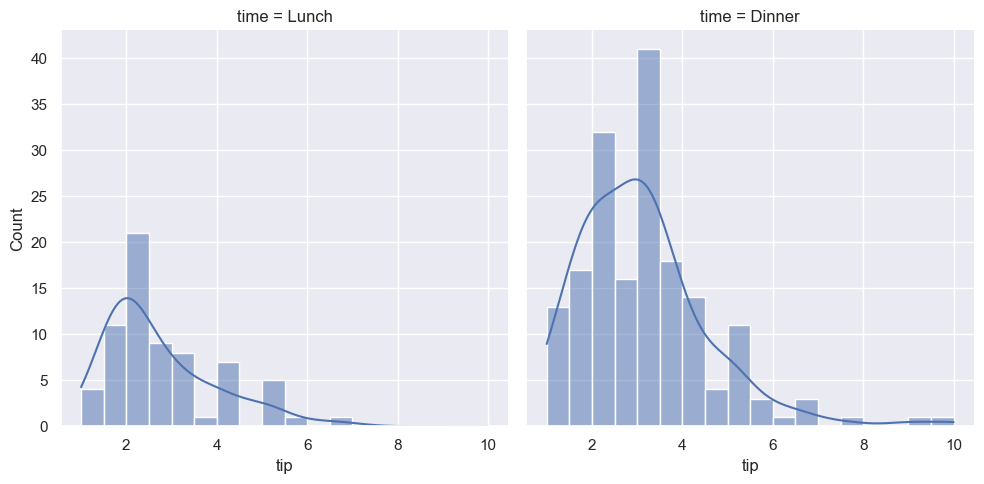

In [45]:
sns.displot(data=tips, x="tip", col="time", kde=True);

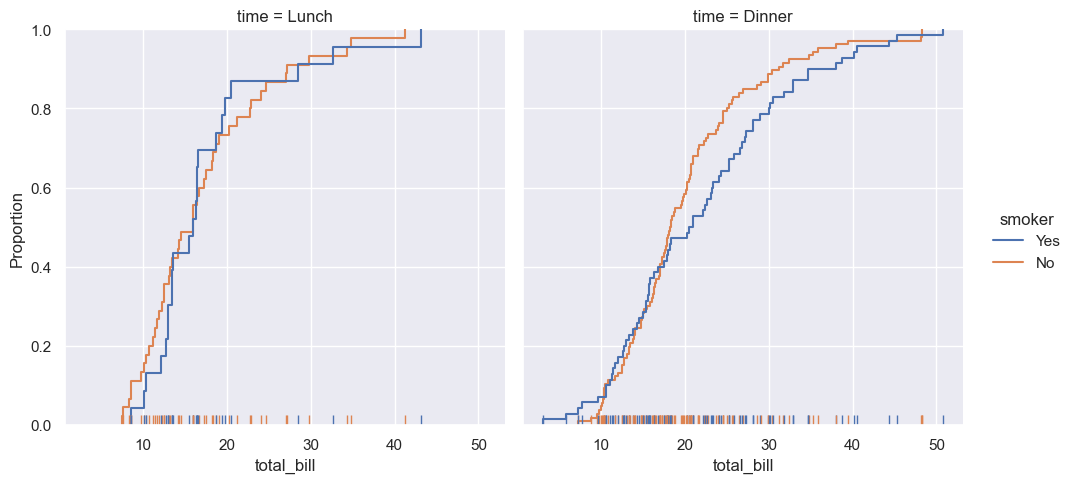

In [48]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True);

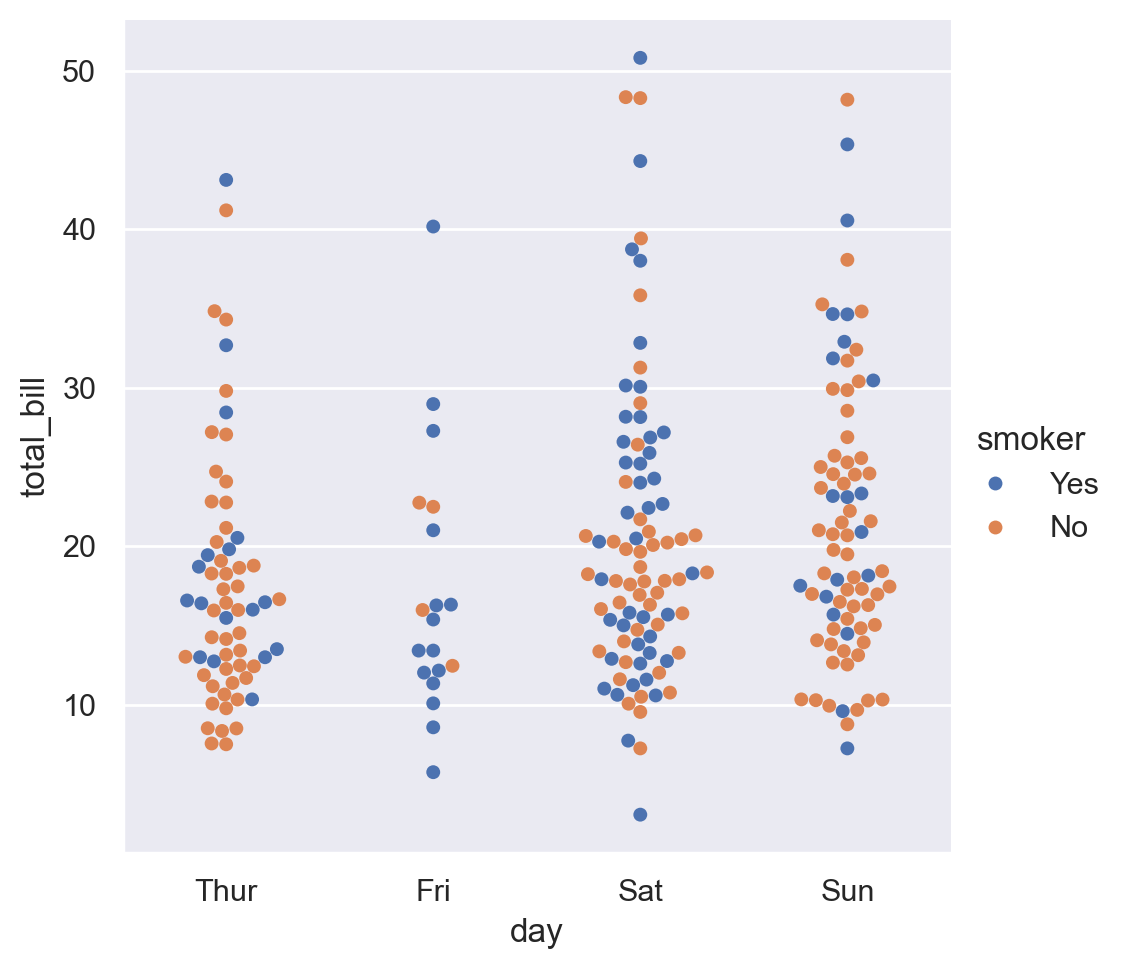

In [57]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

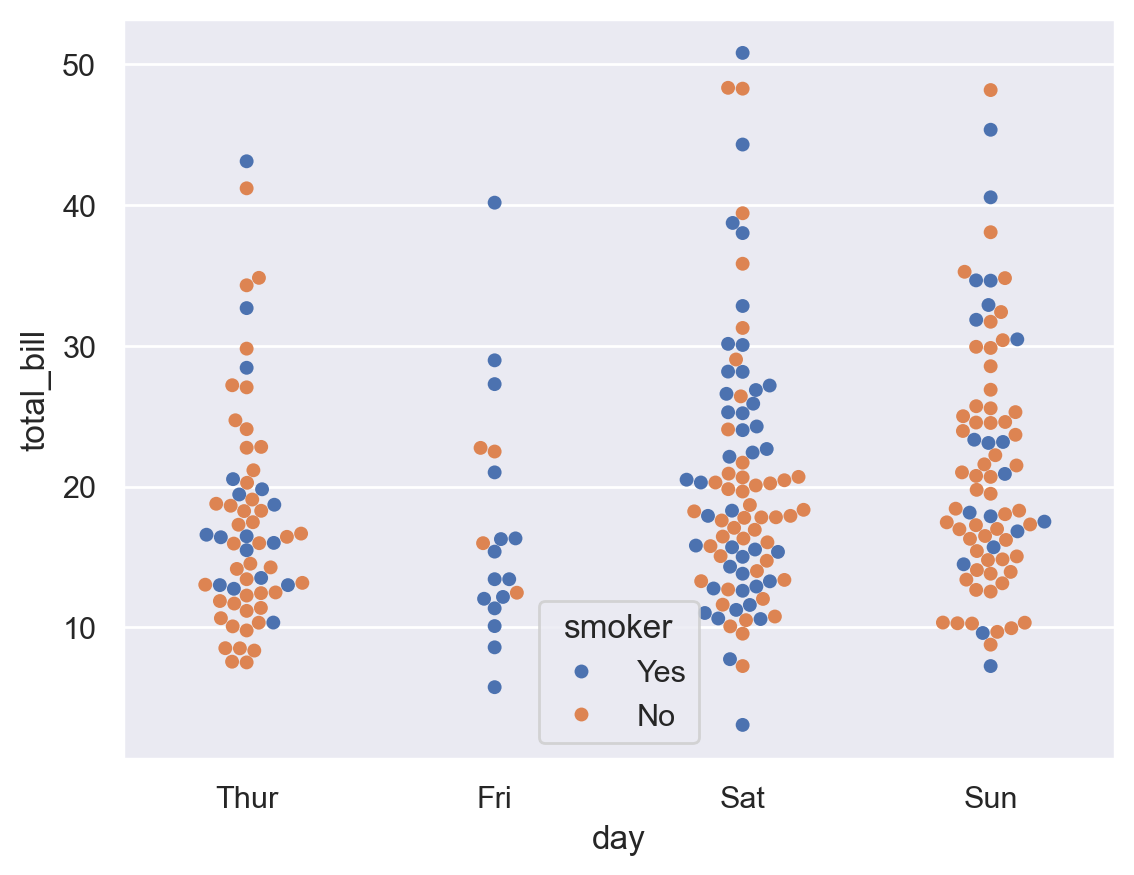

In [58]:
sns.swarmplot(data=tips, x="day", y="total_bill", hue="smoker");

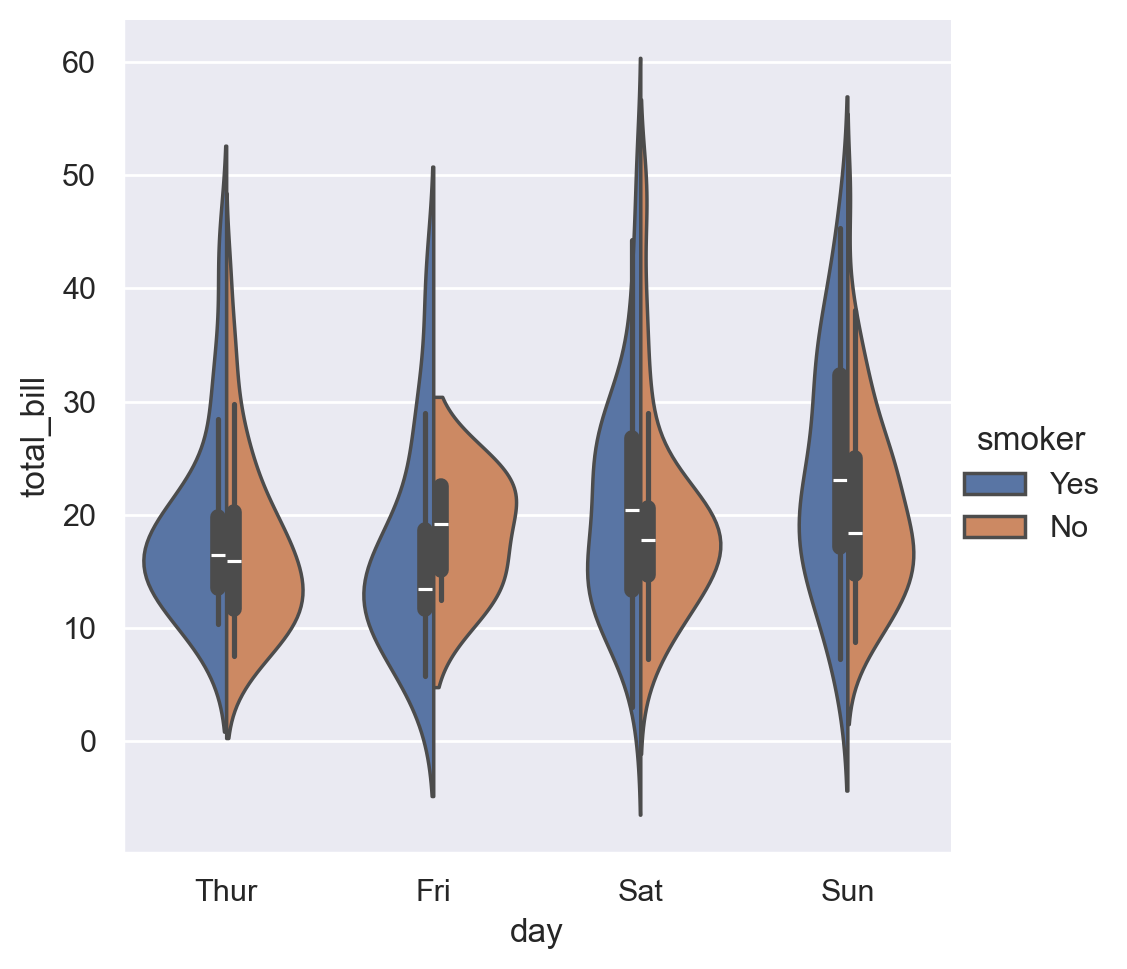

In [60]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True);

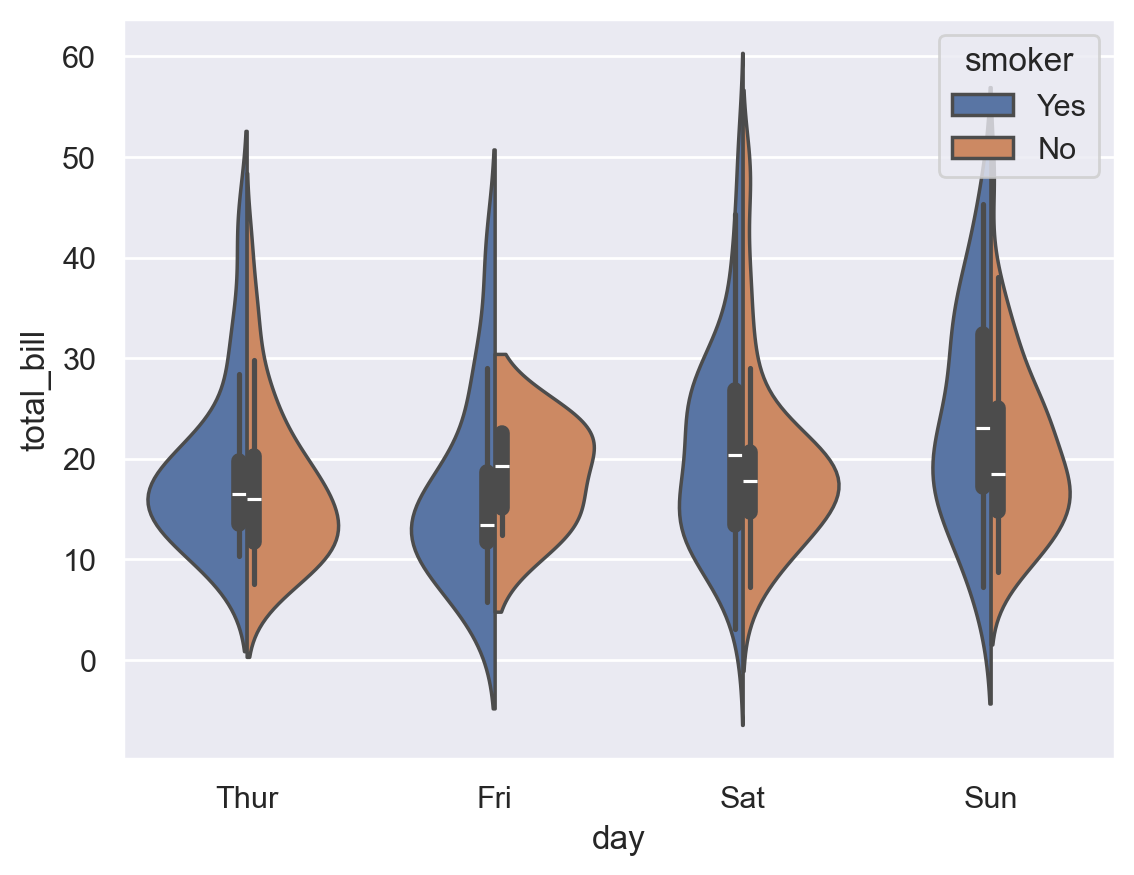

In [62]:
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker", split=True);

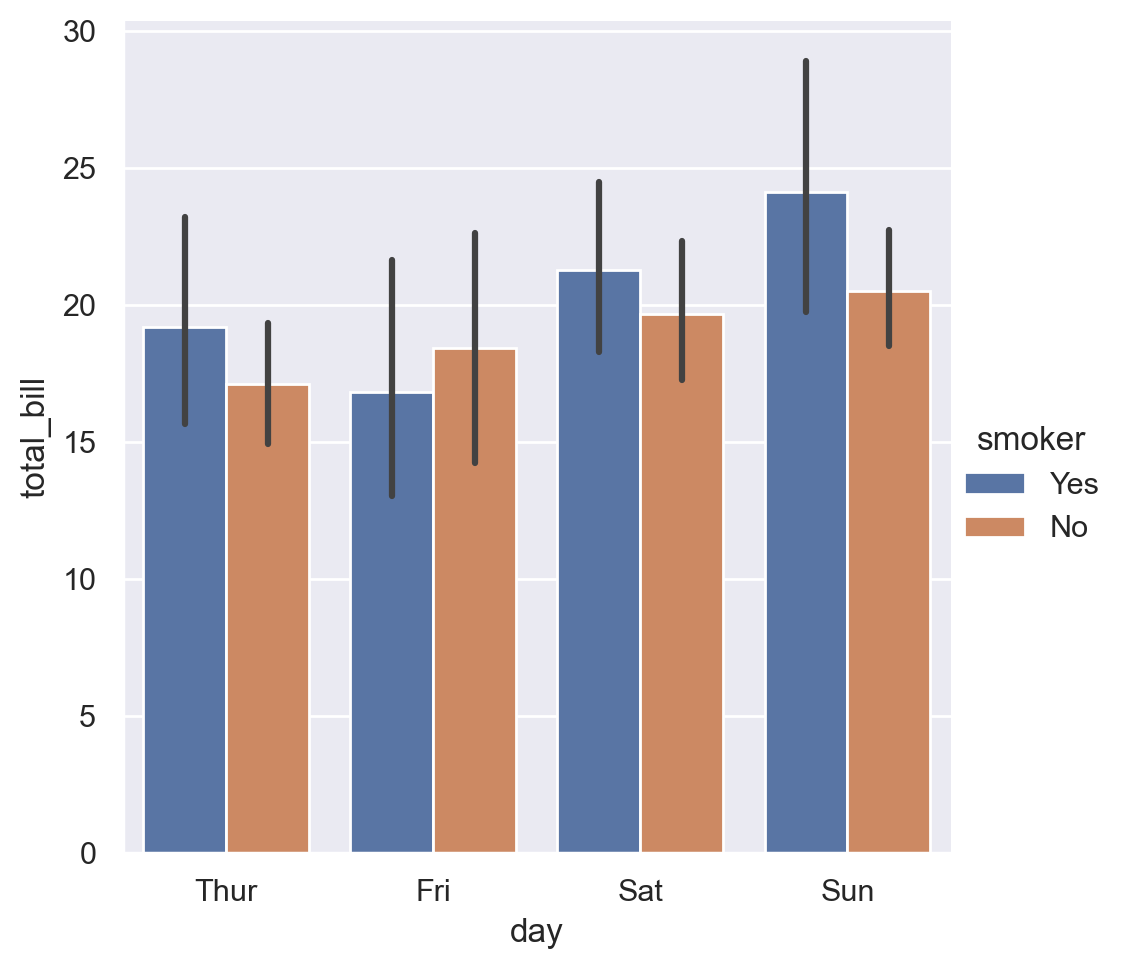

In [64]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker");

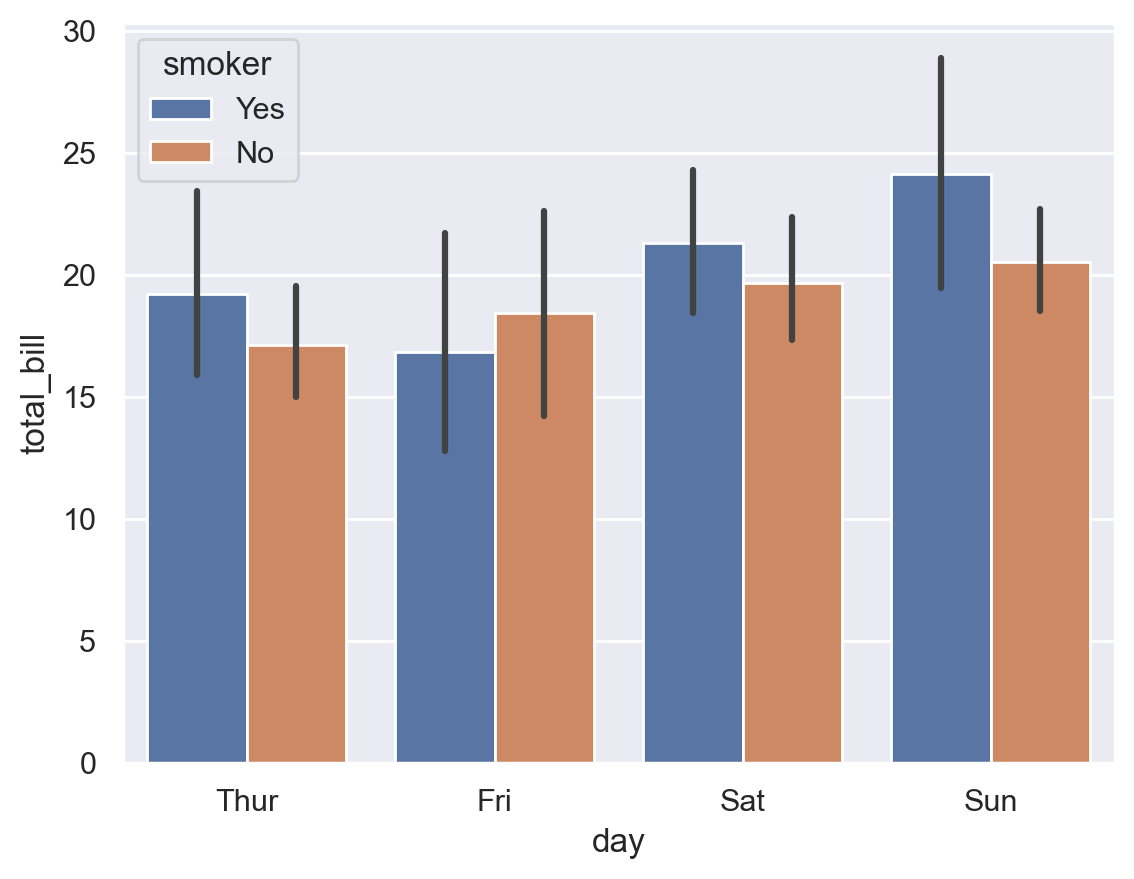

In [66]:
sns.barplot(data=tips, x="day", y="total_bill", hue="smoker");

## [Multivariate views on complex datasets](https://seaborn.pydata.org/tutorial/introduction.html)

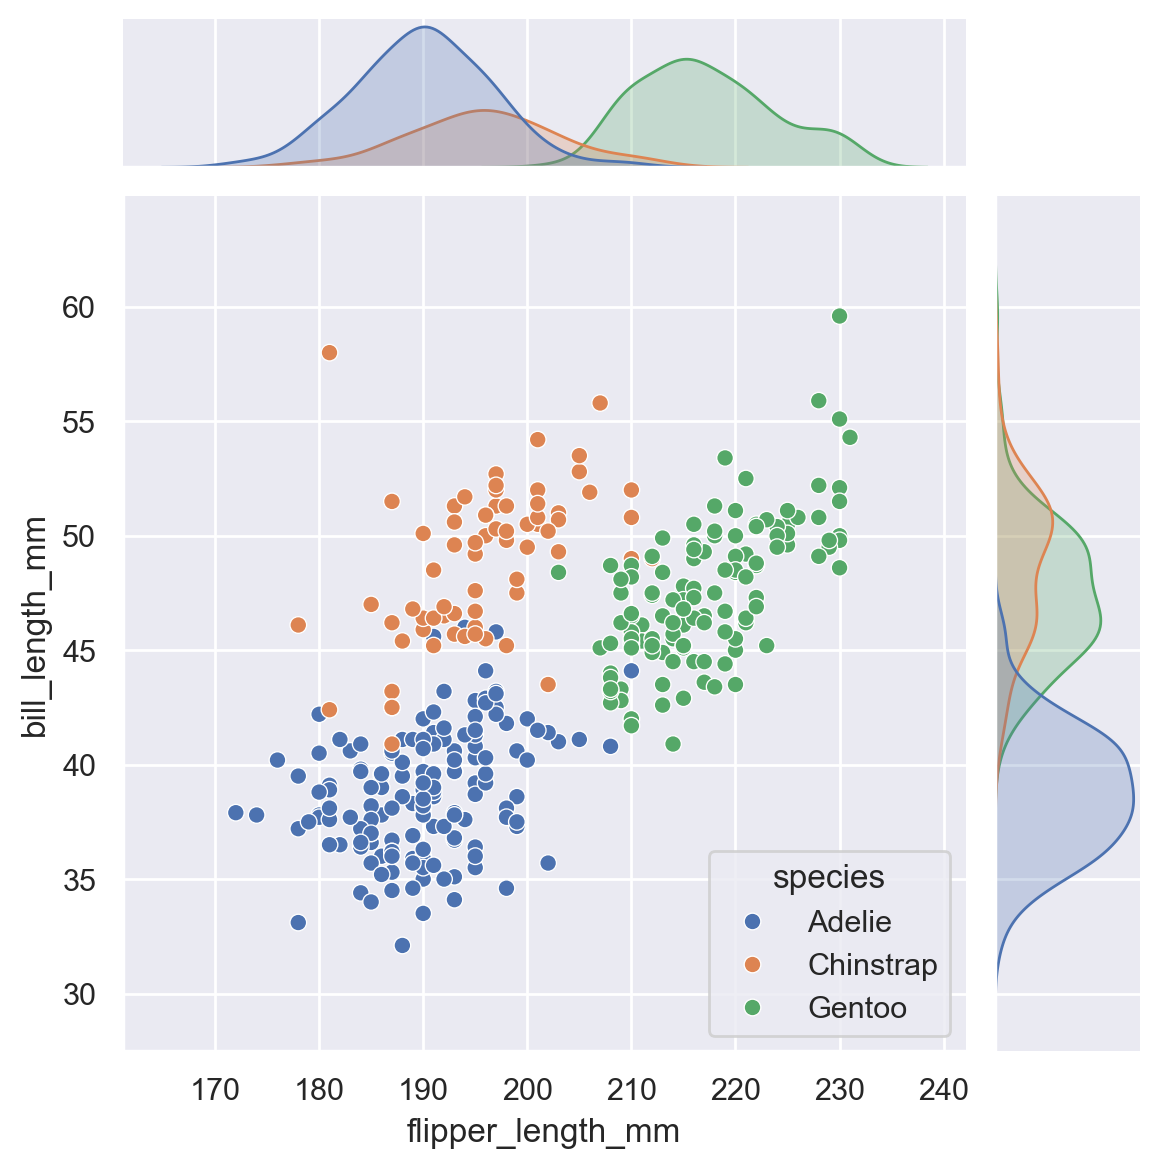

In [68]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species");

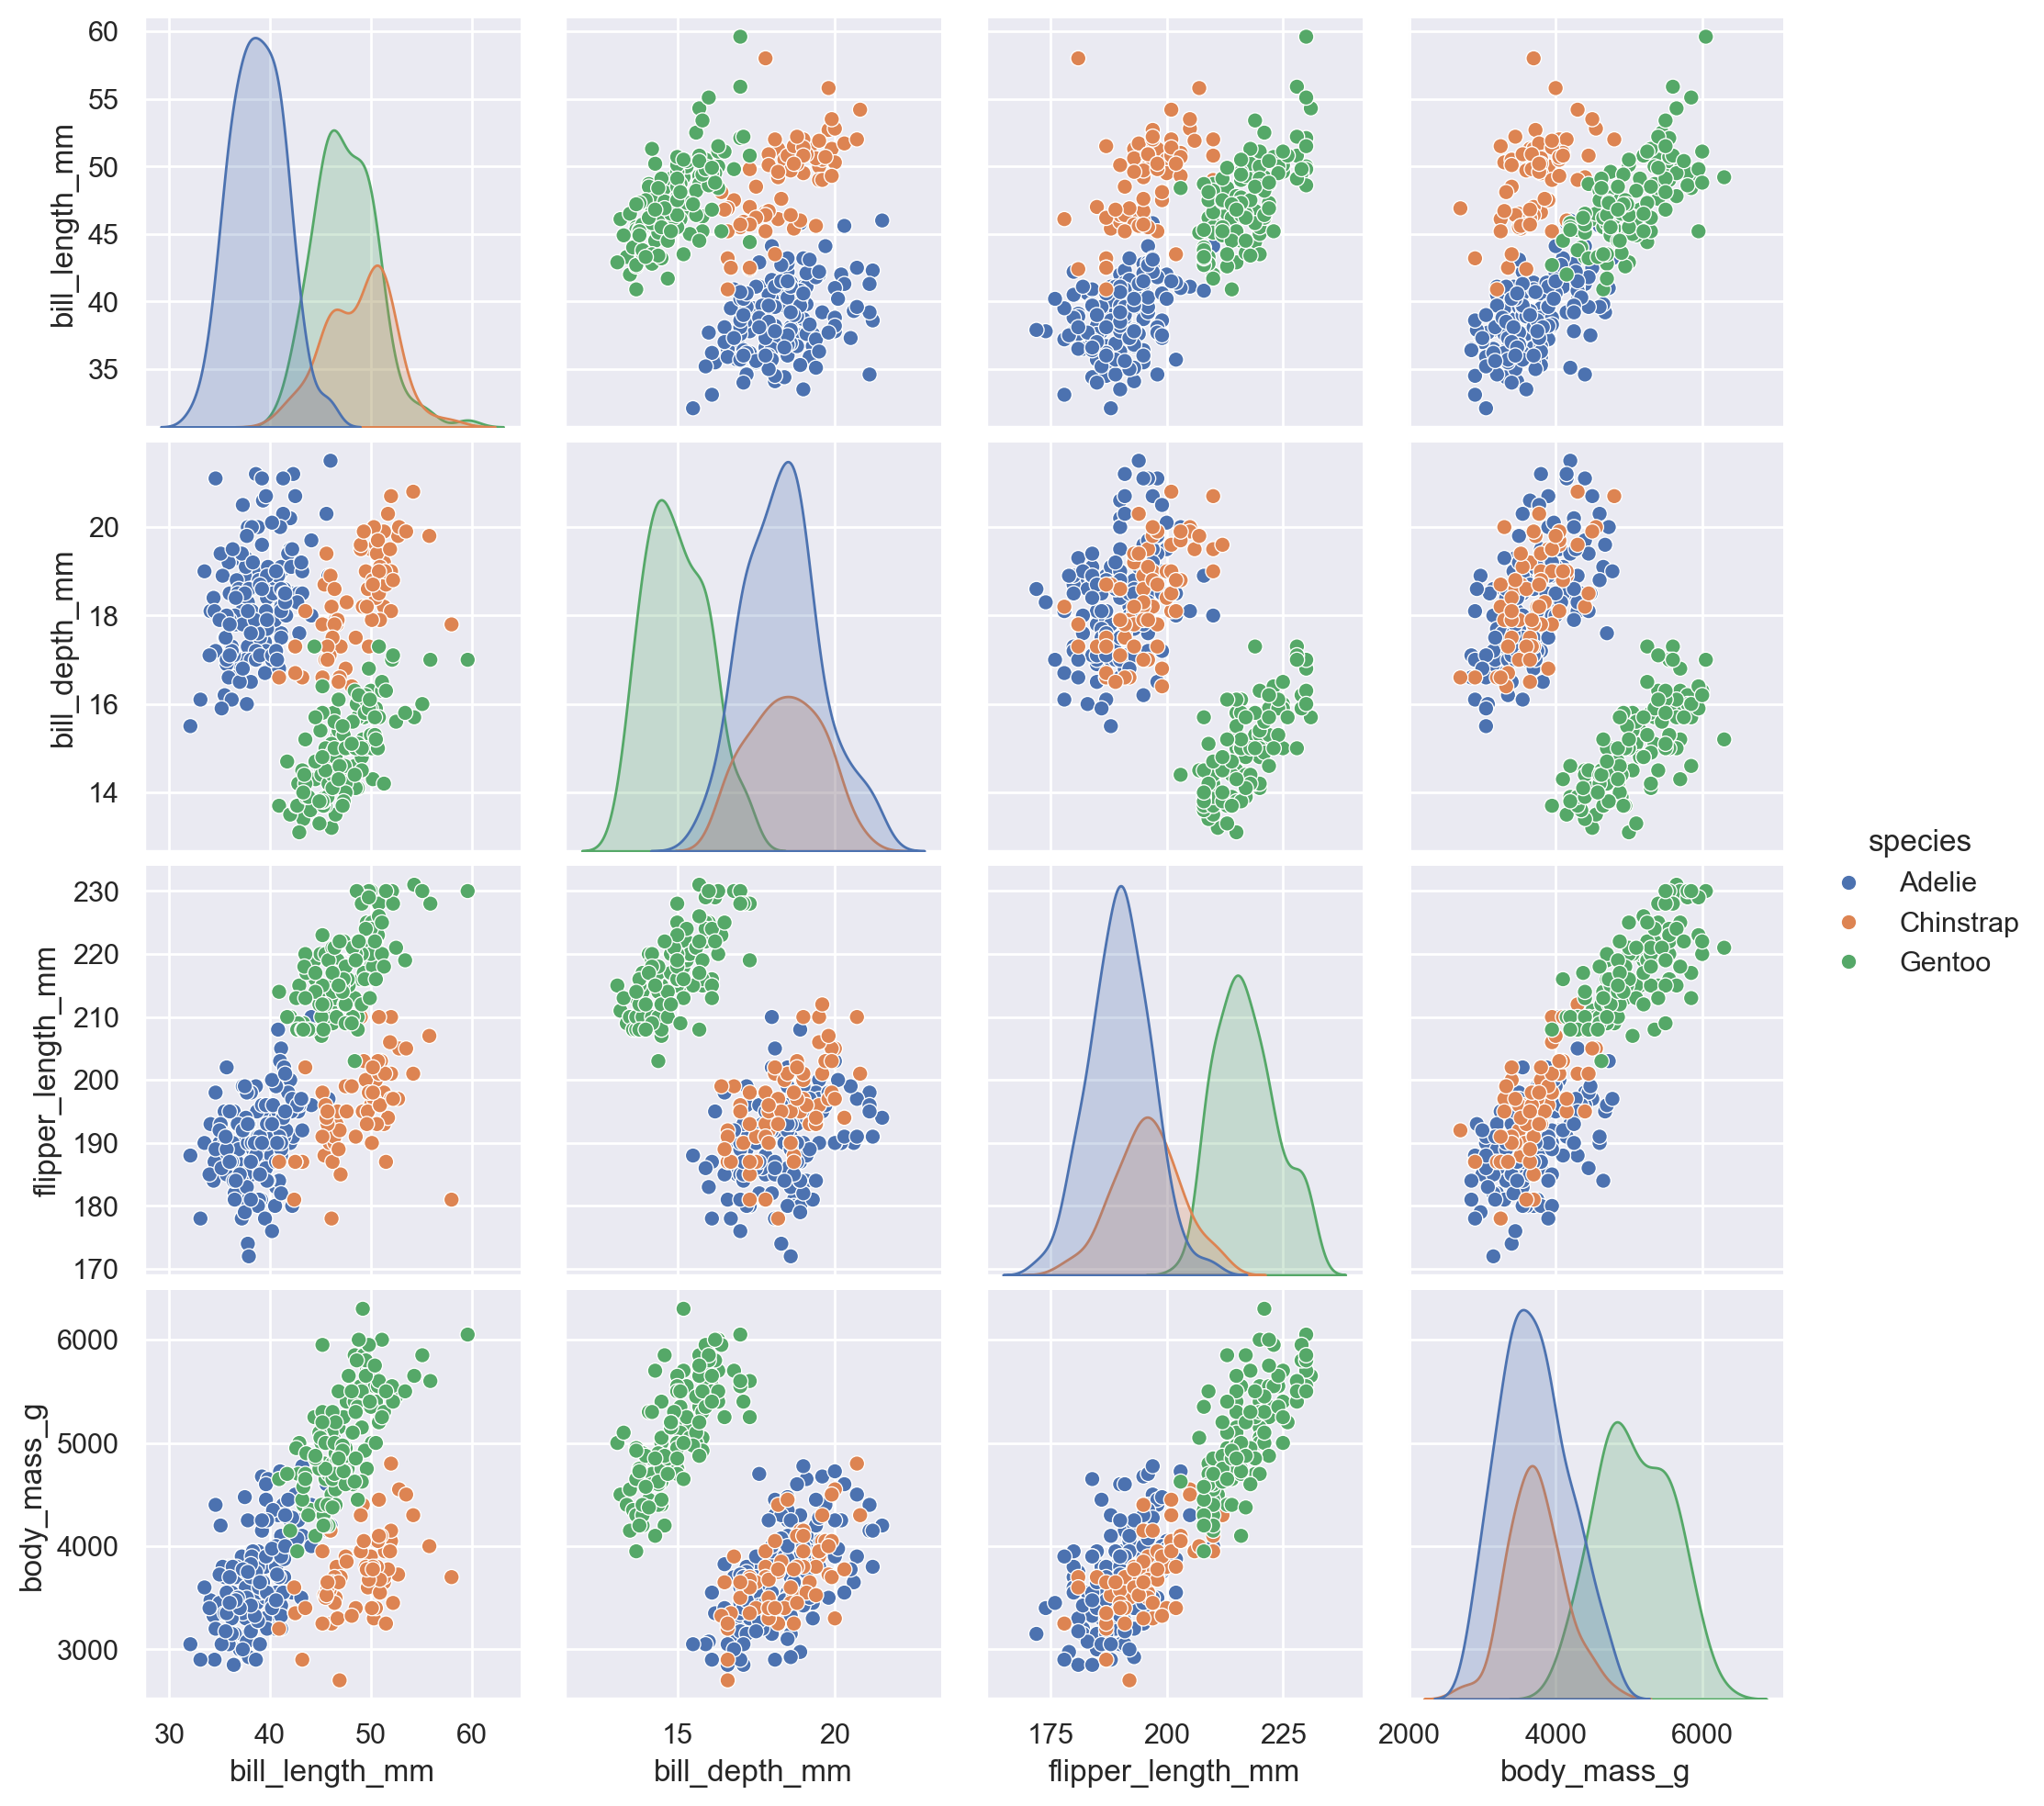

In [70]:
sns.pairplot(data=penguins, hue="species");

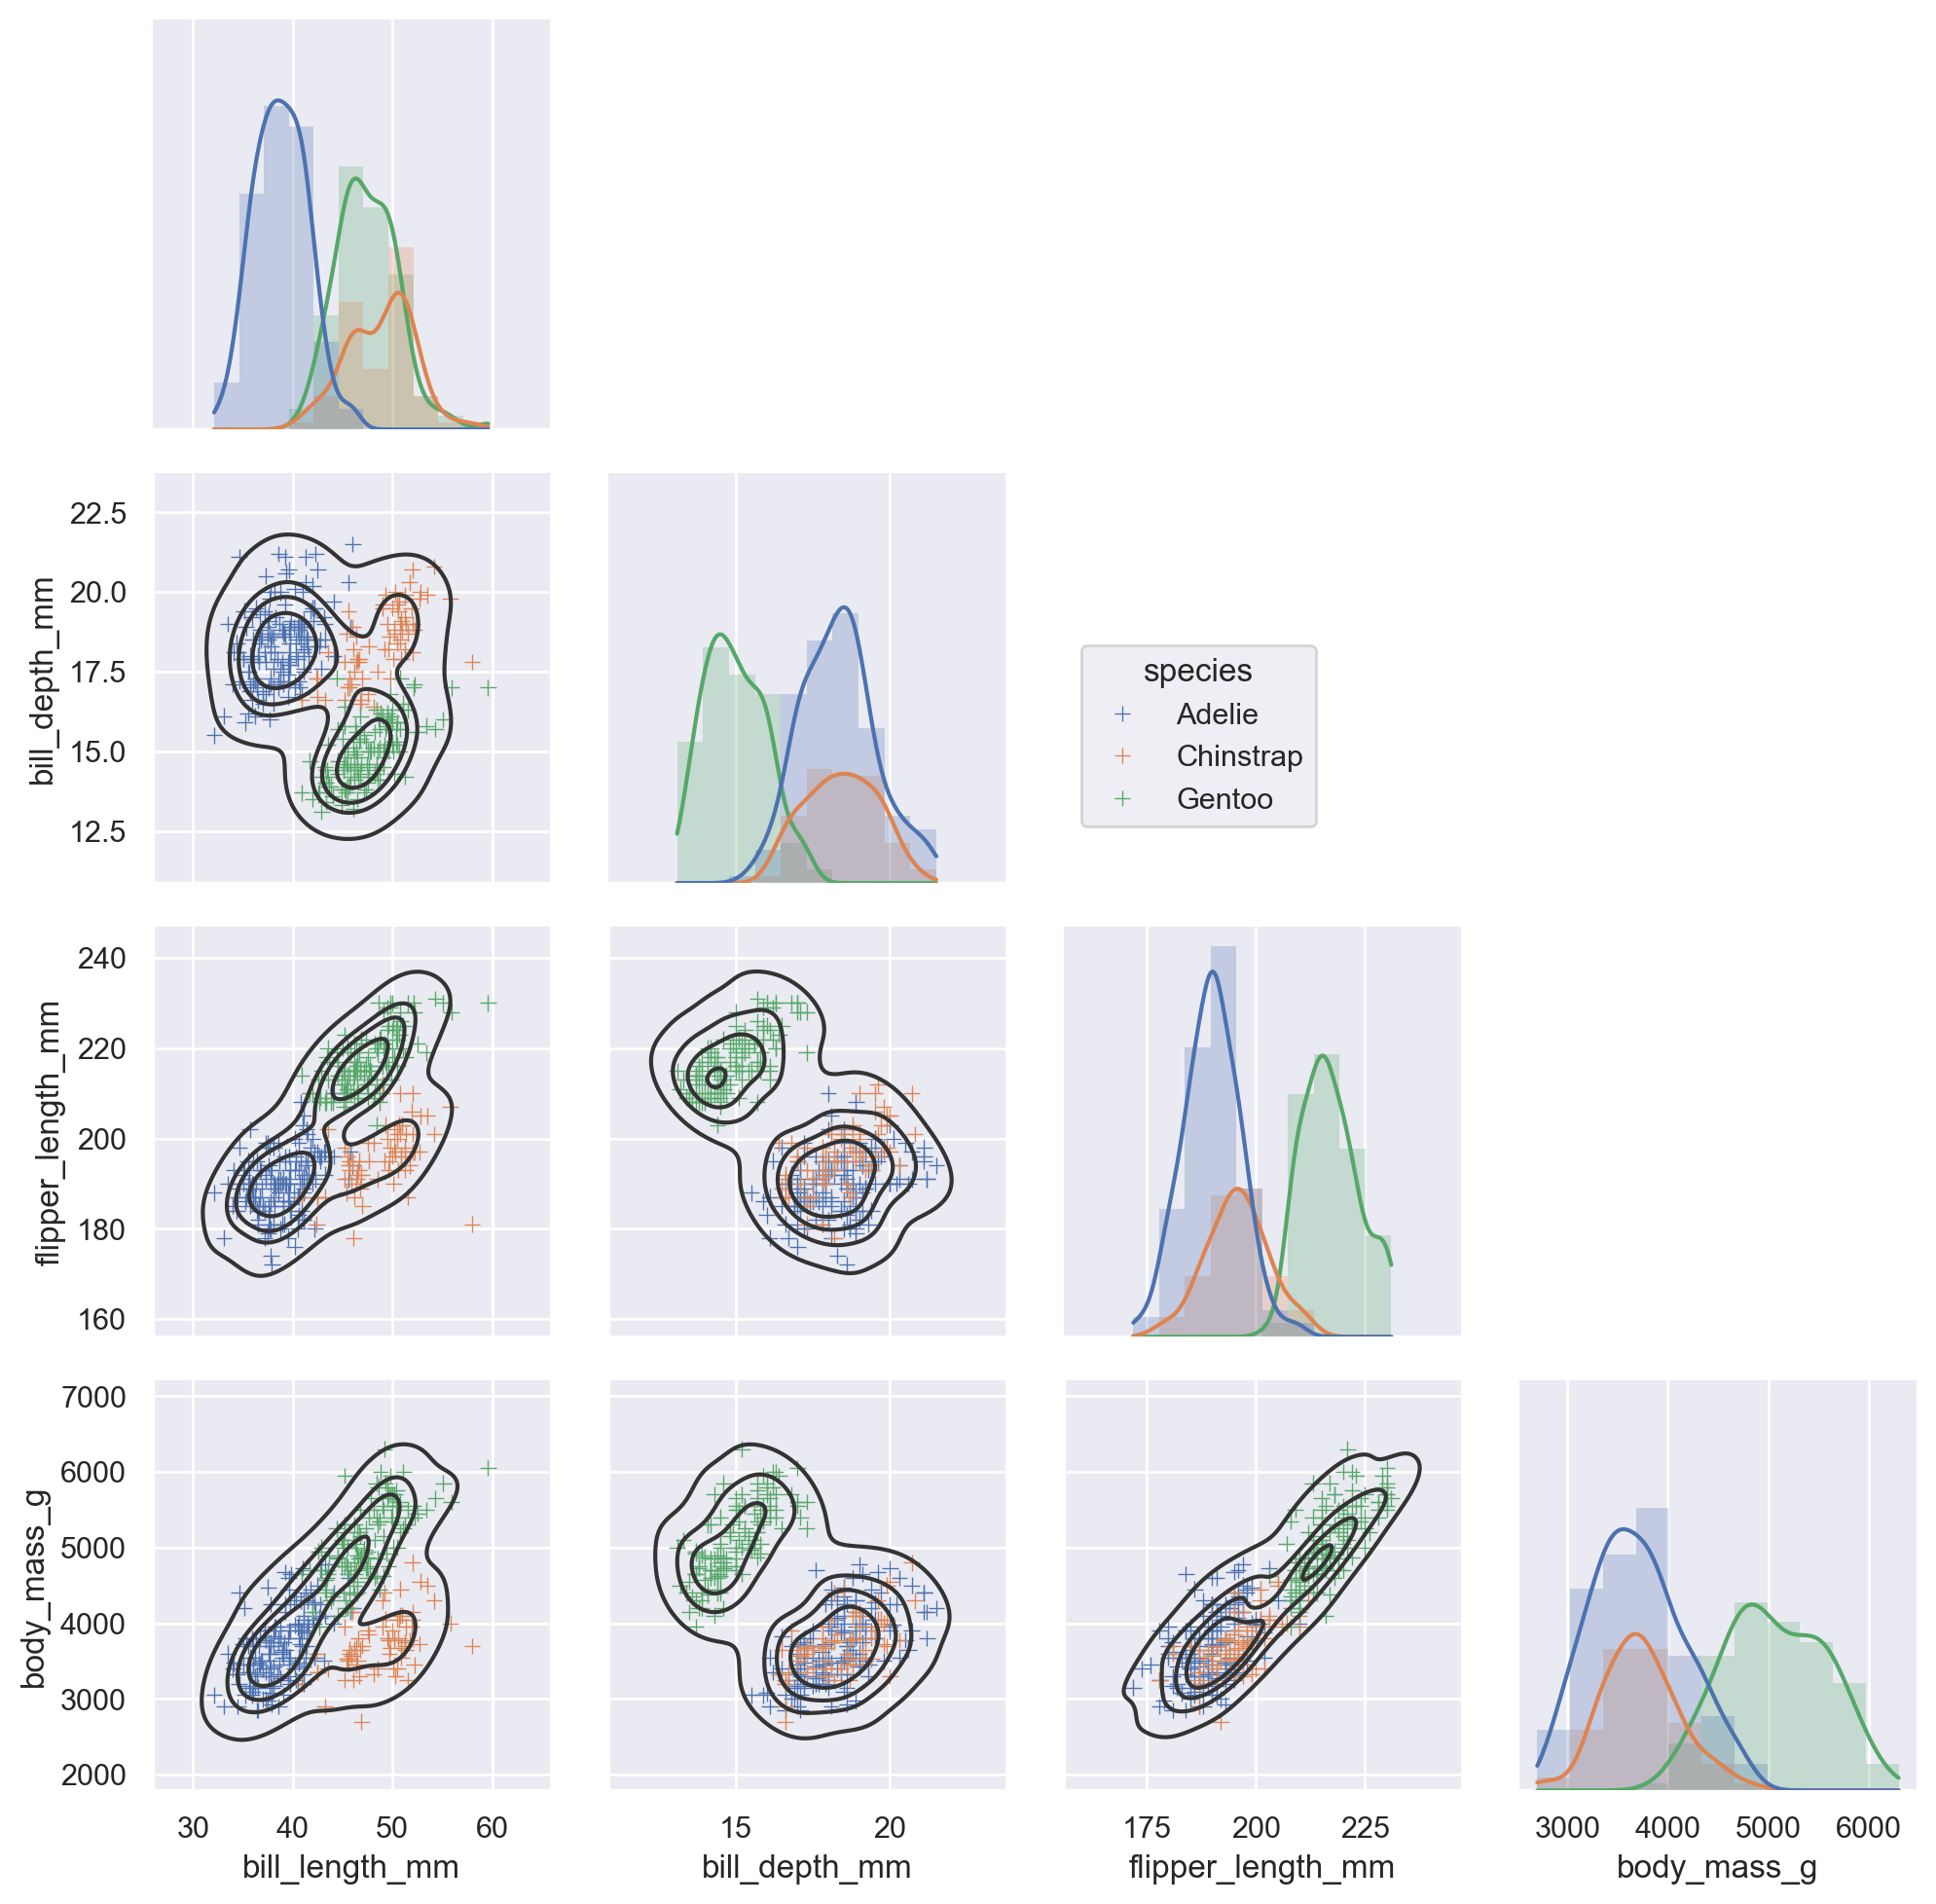

In [71]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

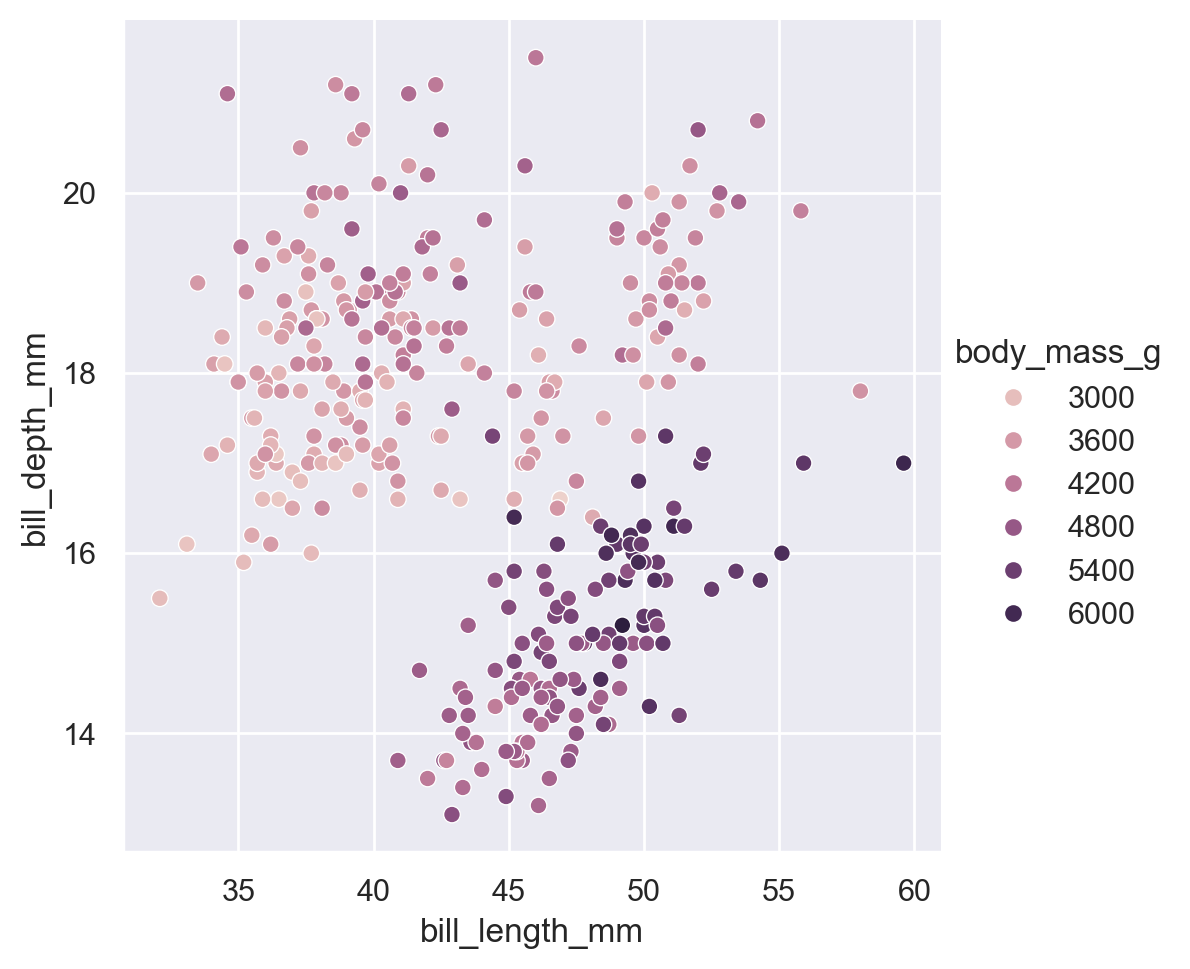

In [73]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
);

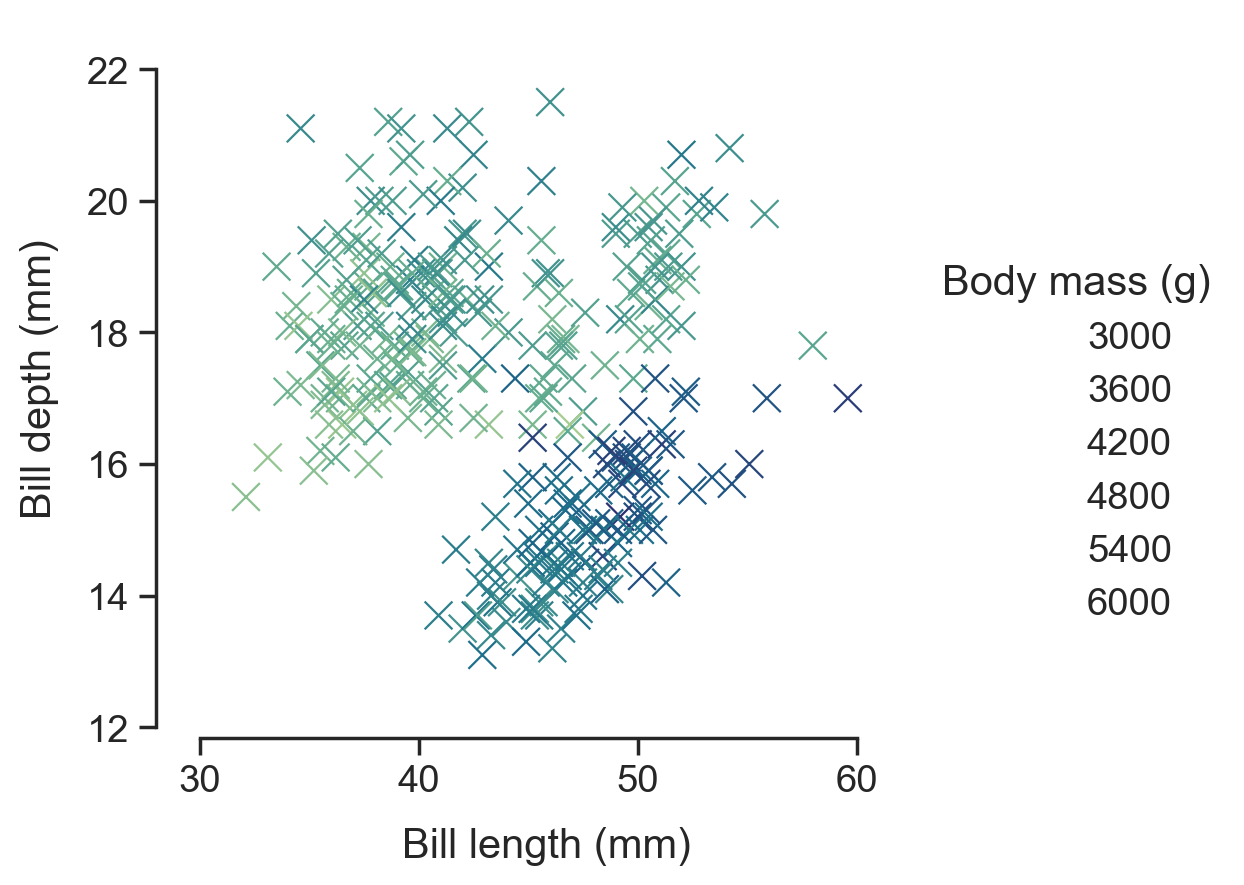

In [76]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)